# 数理最適化

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1, 4], [2, 3], [2, 1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

In [3]:
print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688606


## ２次計画法

## 勾配降下法

In [4]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        # 初期化
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        
        # 繰り返し処理
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

In [5]:
# 最適化する関数の定義
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

In [6]:
# 導関数の定義
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

In [9]:
# 最適化
# 1) GDクラスに最適化する関数と導関数を渡す
algo = GradientDescent(f, df)

# 2) 初期値として x=1, y=1を設定
initial = np.array([1, 1])

# 3) 
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


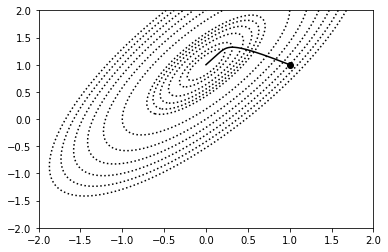

In [11]:
plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k",
         linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape),
            levels=levels,
            colors="k",
            linestyles="dotted")
plt.show()

## ニュートン法

In [1]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    iter = 0
    while True:
        x_new = x - f(x)/df(x)
        if abs(x - x_new) < eps:
            break
        x = x_new
        iter += 1
        if iter == max_iter:
            break
    return x_new


def f(x):
    return x**3 - 5*x + 1


def df(x):
    return 3*x**2 - 5

In [2]:
newton1dim(f, df, 2)

2.1284190638445777

In [3]:
newton1dim(f, df, 0)

0.20163967572340463

In [4]:
newton1dim(f, df, -3)

-2.330058739567982

In [16]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
    
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(np.linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if ((x - x_new)**2).sum() < self.eps**2:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

In [17]:
def f1(x, y):
    return x**3 - 2*y

def f2(x, y):
    return x**2 + y**2 - 1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

In [19]:
solver = Newton(f, df)
initials = [np.array([1, 1]), np.array([-1, -1]), np.array([1, -1])]

for x0 in initials:
    sol = solver.solve(x0)
    print(sol)

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]
